# 0. Import neccesary libraries

In [72]:
import torch
import wave
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import spectrogram

# 1. Test the dataset

44100
[0 0 0 ... 0 0 0]


/var/folders/vw/fdrl_85534sdc5svv3301tsw0000gn/T/ipykernel_21569/2821281307.py:29: RuntimeWarning: divide by zero encountered in log10
  im1 = axes[0].pcolormesh(t_corrected, f, 10 * np.log10(Sxx), cmap='inferno')  # Applying log scale for better visualization
/var/folders/vw/fdrl_85534sdc5svv3301tsw0000gn/T/ipykernel_21569/2821281307.py:36: RuntimeWarning: divide by zero encountered in log10
  im2 = axes[1].pcolormesh(t_corrected, f, 10 * np.log10(normalized_spectrogram), cmap='inferno')  # Applying log scale for better visualization


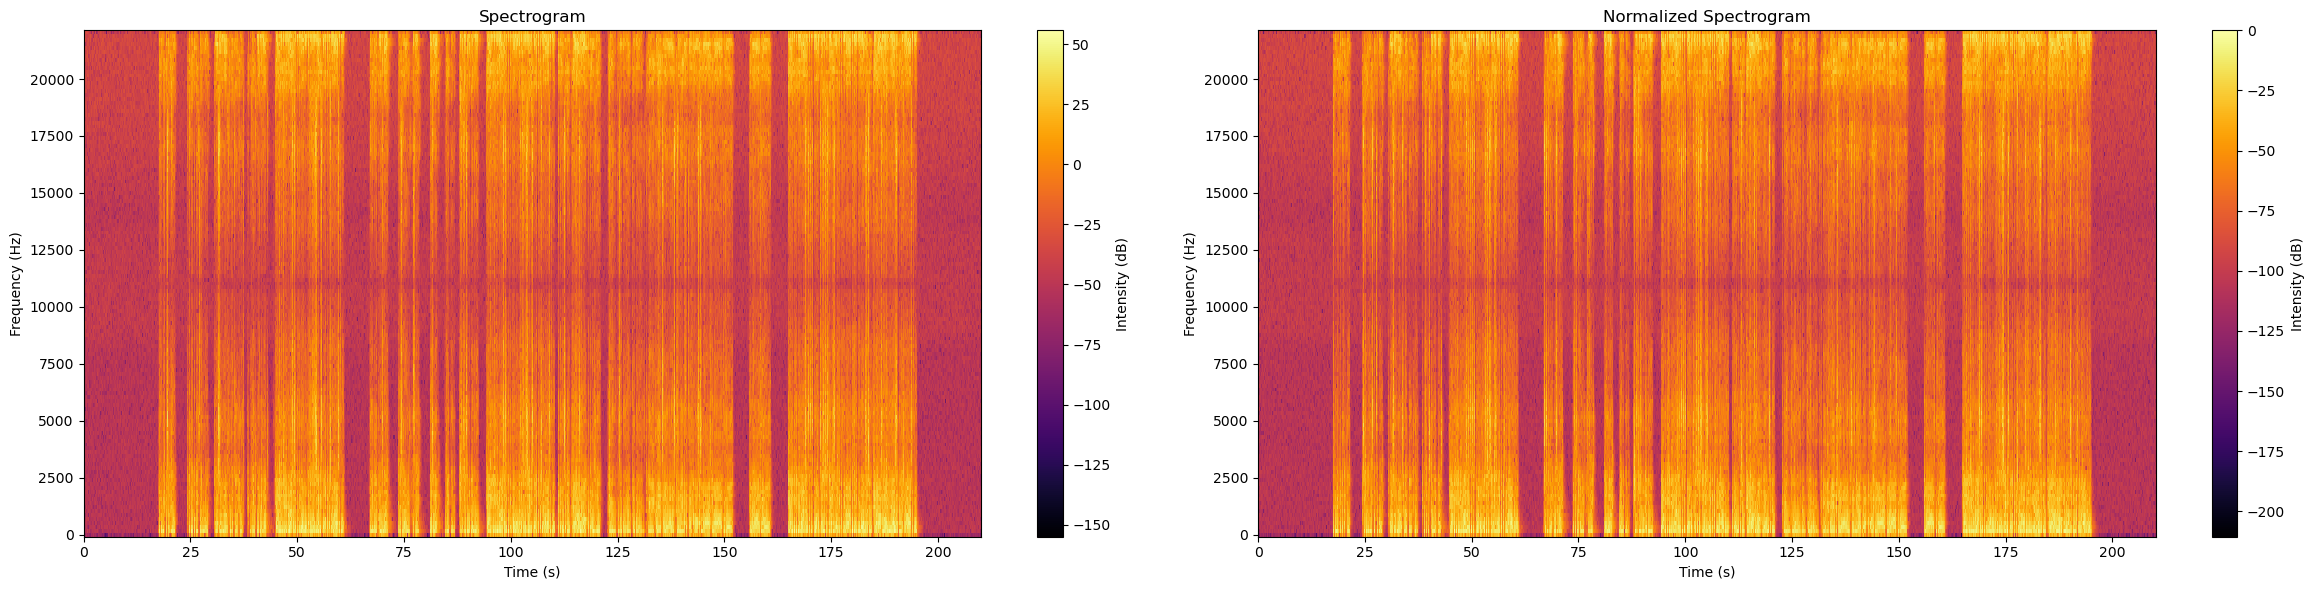

In [73]:
# Load the audio file
audio_file_path = './music_data/musdb18hq/test/Am Contra - Heart Peripheral/vocals.wav'

# Open the .wav file
audio_file = wave.open(audio_file_path, 'rb')

# Read audio data
signal = np.frombuffer(audio_file.readframes(-1), dtype=np.int16)
sample_rate = audio_file.getframerate()
print(sample_rate)
print(signal)

# Close the .wav file
audio_file.close()

# Compute the spectrogram
f, t, Sxx = spectrogram(x=signal, fs=sample_rate)

duration = len(signal) / sample_rate  # Duration of the audio in seconds
t_corrected = np.linspace(0, duration/2, len(Sxx[0]), endpoint=False)  # Generate corrected time axis

# Normalize the spectrogram
normalized_spectrogram = (Sxx - np.min(Sxx)) / (np.max(Sxx) - np.min(Sxx))

# Plot the spectrogram
fig, axes = plt.subplots(1,2, figsize=(24, 6))

# Plot the regular spectrogram
im1 = axes[0].pcolormesh(t_corrected, f, 10 * np.log10(Sxx), cmap='inferno')  # Applying log scale for better visualization
axes[0].set_ylabel('Frequency (Hz)')
axes[0].set_xlabel('Time (s)')
axes[0].set_title('Spectrogram')
plt.colorbar(im1, ax=axes[0], label='Intensity (dB)')  # Add colorbar to the first subplot

# Plot the normalized spectrogram
im2 = axes[1].pcolormesh(t_corrected, f, 10 * np.log10(normalized_spectrogram), cmap='inferno')  # Applying log scale for better visualization
axes[1].set_ylabel('Frequency (Hz)')
axes[1].set_xlabel('Time (s)')
axes[1].set_title('Normalized Spectrogram')
plt.colorbar(im2, ax=axes[1], label='Intensity (dB)')  # Add colorbar to the second subplot

plt.tight_layout()
plt.show()

In [74]:
print(f'The .wav file has {len(signal)} samples')
print(f'The .wav file has a sampling rate of {sample_rate} [Hz]')
print(f'The .wav thus is a total of {len(signal)/sample_rate} [sec]')

print(len(t))

The .wav file has 18531328 samples
The .wav file has a sampling rate of 44100 [Hz]
The .wav thus is a total of 420.2115192743764 [sec]
82729
